# Importing...

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
pokemon = pd.read_csv('../Dataset.csv', sep=',')

# Bivariate analysis on a combination of categorical columns...

Firstly, 2 methods need to be defined for usage:

In [4]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [5]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

## Type 1 vs Experience type

I expect that there will be a correlation between types and experience type. I predict types which don't have an edge over many other types will generally have a faster experience type.

In [6]:
pokemonContingencyTable = create_contingency_table(pokemon, 'Type 1','Experience type')
pokemonContingencyTable

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Experience type,,,,,,,,,,,,,,,,,,
Erratic,4,0,2,0,0,0,0,0,0,3,0,0,2,0,0,8,0,7
Fast,4,2,0,2,9,0,0,0,10,0,0,1,19,0,7,2,3,8
Fluctuating,1,0,0,0,0,2,0,0,2,2,0,0,0,3,0,0,0,4
Medium Fast,52,21,1,32,10,19,22,3,20,24,24,20,54,26,21,21,13,43
Medium Slow,11,10,0,9,0,13,34,3,7,51,8,6,21,6,12,14,3,37
Slow,9,13,39,16,3,8,8,2,2,11,9,11,18,5,37,14,17,32


As expected earlier, some types level faster; namely types with less coverage.

<AxesSubplot:xlabel='Experience type'>

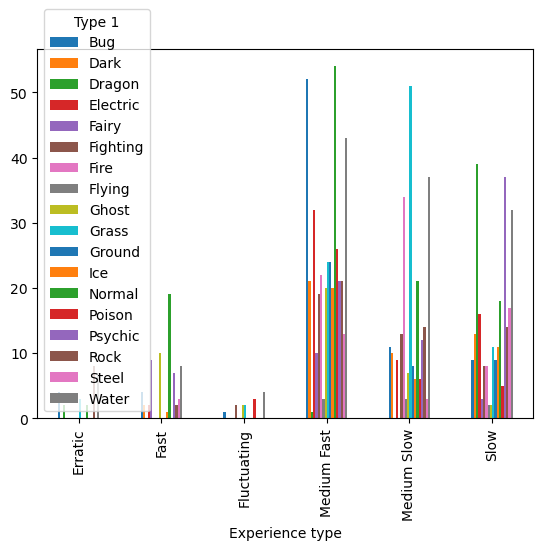

In [7]:
pokemonContingencyTable.plot(kind='bar')

While hard to read, this barplot is useful for seeing which types generally level up fast or slow. Types like bug or normal level up fast, while Dragon and Psychic level up slowly.

In [8]:
check_cat_vs_cat_correlation(pokemon, 'Type 1','Experience type')

The odds of a correlation between Type 1 and Experience type is 100.0% (Based on a p value of 4.9168767382173473e-54).
This percentage needs to be at least 95% for a significant correlation.
